<a href="https://colab.research.google.com/github/fintechutcc/mof-training/blob/main/mof-training-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ```sklearn``` API

## ชุดข้อมูล (Datasets) 
ใน ```sklearn``` มีชุดข้อมูลที่สามารถนำมาใช้ในการทดสอบหลากหลาย และสะดวก รายละเอียดเพิ่มเติมดูได้ที่ [https://scikit-learn.org/stable/datasets/index.html](https://scikit-learn.org/stable/datasets/index.html)

ตัวอย่างต่อไปนี้ เป็นการโหลดชุดข้อมูล Iris สังเกตว่า Class labels มี 3 ค่าคือ 0, 1, และ 2

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## การแบ่งและสำรวจชุดข้อมูล

ใน ```sklearn``` มีชุดคำสั่งในการแยกข้อมูลออกเป็น ชุดข้อมูลสำหรับสอน (Training Data) และชุดข้อมูลสำหรับทดสอบ (Testing Data) โดยใช้ฟังก์ชัน train_test_split ดังนี้

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=2020, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


## Standardization
```sklearn``` มีเครื่องมือในการทำ Feature Scaling โดยใช้ StandardScaler ดังนี้

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

## Perceptron

Perceptron เป็นหนึ่งใน linear models ที่รองรับใน ```sklearn``` ตัวอย่างการสร้าง Perceptron จาก sklearn เป็นดั่งเซลด้านล่างนี้

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(eta0 = 0.1, random_state = 2020)
perceptron.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=2020, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = perceptron.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 7


In [ ]:
X_test_std

array([[ 0.42427983,  0.16347763],
       [ 1.04224099,  1.67401089],
       [ 0.70517127,  1.12472607],
       [-0.08132476,  0.16347763],
       [ 0.53663641,  0.30079883],
       [-1.20489051, -1.34705564],
       [ 0.76134956,  1.67401089],
       [ 0.64899298,  1.12472607],
       [ 0.03103182, -0.11116479],
       [-1.2610688 , -1.34705564],
       [-1.2610688 , -1.48437684],
       [-1.31724709, -1.34705564],
       [ 0.64899298,  0.85008365],
       [ 0.92988442,  1.53668968],
       [ 1.77255873,  1.53668968],
       [ 0.42427983,  0.43812004],
       [ 0.19956668,  0.16347763],
       [-0.13750305, -0.24848599],
       [-1.2610688 , -1.34705564],
       [-1.03635565, -1.07241323],
       [ 0.25574497,  0.02615642],
       [ 0.42427983,  0.43812004],
       [ 1.09841928,  1.53668968],
       [ 1.09841928,  1.81133209],
       [-1.31724709, -1.34705564],
       [-1.20489051, -1.34705564],
       [ 1.32313243,  0.98740486],
       [ 0.42427983,  0.57544124],
       [ 0.48045812,

In [ ]:
a = [[0.42427983,  0.16347763], [-1.2610688 , -1.34705564]]
pred = perceptron.predict(a)
print(pred)

[1 0]


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.844


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


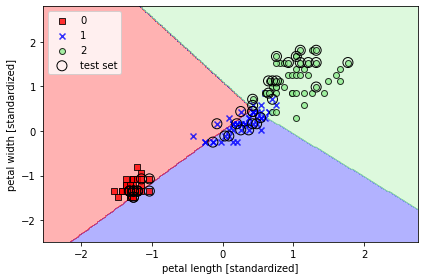

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=perceptron,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
